A portable Near Infra Red (NIR) spectometer was explored in this study to probe lab-formulated Ciprofloxacin samples housed in clear capsule (NOW,Bloomingdale, IL). NIR spectrometer spectra features for field collected Ciprofloxacin tablet could be similar but may slightly vary when another NIR spectrometer is used. Variation in spectrometer could significantly impact predictive models. We tested the robustness of the spectra generated by our NIR spectrometer from lab-made Ciprofloxacin formulations on field samples spectra of Ciprofloxacin tablets of another spectrometer. High performance liquid chromatography was performed on the field samples to cross validate the predictions from our model.

Mixture of Ciprofloxacin and alpha crystalline cellulose were formulated in the lab with active pharmaceuticals ingredients (API)- Ciprofloxacin content (w/w) used in the regression studies. We used this as hypothetical study as most Ciprofloxacin exist in tablet forms rather than in capsules.Our study revealed that models developed from lab-made Ciprofloxacin formulation housed in a clear capsule can be used to probe Ciprofloxacin tablets from the field samples with a good accuracy.


See the supplementary information of our work titled "Calibration transfer between near-infrared spectrophotometers for field screening of ciprofloxacin dosage forms)" for the lab based formulations used in this work

In [ ]:
#Import libraries including pyopls,which was used to pretreat the data for orthogonal signal correction (OSC). This library helps overcome the need for y-vector in OSC data reprocessing most especially for field collected samples whose y-vectors were being investigated 

In [1]:
pip install pyopls


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA as sk_pca
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from pyopls import OPLS
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.metrics import r2_score, accuracy_score

In [3]:
#Lab Formulated Ciprofloxacin were housed in clear gelatin capsules and probed with NIR spectrometer for regression studies

#Visual inspection of line plot of the raw date from lab formulated Ciprofloxacin in varying capsules when introduced to NIR spectrometer

CIPRO LAB FORMULATION WITH CRYSTALLINE CELLULOSE

In [4]:
#Import the raw lab formulated Ciprofloxacin

In [5]:
#Import the raw lab formulated Ciprofloxacin
data_dece = pd.read_csv(r'Cipro_Data.csv')
x_dece= data_dece.values[:,3:]

wv = np.arange(900,1700,3.52)

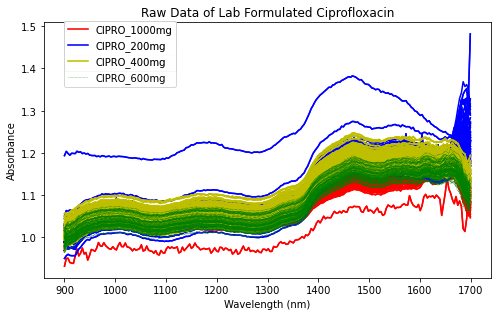

In [6]:
#Visual inspection of line plot of the raw date from lab formulated Ciprofloxacin in capsules of varying opacities and colors when introduced to NIR spectrometer


spectra_dece = pd.read_csv(r'Cipro_Data.csv')
target_dece = pd.read_csv(r'Cipro_conc_mg.csv')

spectra_dece = pd.DataFrame(spectra_dece)
spectra_dece = spectra_dece.values[0:,0:]
spectra_dece_T = spectra_dece.T

CIPRO_1000mg_RAW =spectra_dece_T[:,0:200]
CIPRO_200mg_RAW =spectra_dece_T[:,201:402]
CIPRO_400mg_RAW =spectra_dece_T[:,403:604]
CIPRO_600mg_RAW =spectra_dece_T[:,605:804]


fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, CIPRO_1000mg_RAW, label='CIPRO_1000mg',color='r');
ax.plot(wv, CIPRO_200mg_RAW, label='CIPRO_200mg',color='b');
ax.plot(wv, CIPRO_400mg_RAW, label='CIPRO_400mg',color='y');
ax.plot(wv, CIPRO_600mg_RAW, label='CIPRO_600mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("Raw Data of Lab Formulated Ciprofloxacin")


#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

Predictive Models(support vector machine regression (SVM-R) & partial Least square regression(PLS-R)) for the raw dataset

In [7]:
#Split the dataset to train and test sets

X_dece_n= pd.DataFrame(StandardScaler().fit_transform(spectra_dece_T))

x_dece_n = X_dece_n.T
y_dece_n = pd.DataFrame(target_dece)
x_train_dece_a,x_test_dece_a,y_train_dece_a,y_test_dece_a = train_test_split(x_dece_n,y_dece_n,random_state=0,test_size=0.3)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0, 0.5, 'Predicted')

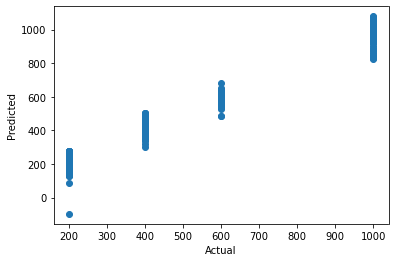

In [8]:
#train support vector machine (SVM) regression with the training dataset

#the SVM_regression - can be optimised by manual tuning the parameters or using grid search

#Train SVM model

regr_dece_n = svm.SVR(kernel='poly',gamma = 0.02, C = 1)

regr_dece_n.fit(x_train_dece_a, y_train_dece_a)

#Test the trained SVM model

clf_1svr_dece_a = regr_dece_n.predict(x_test_dece_a)


#plot the predicted against actual

plt.scatter(y_test_dece_a,clf_1svr_dece_a)

plt.xlabel("Actual")
plt.ylabel("Predicted")

In [9]:
#determine the correlation co-efficient(R-squared) for raw spectra
q_squared_234 = r2_score(y_test_dece_a,clf_1svr_dece_a)
q_squared_234

0.9617234139504228

In [10]:
#determine the root mean sqare error 

mean_squared_error(y_test_dece_a,clf_1svr_dece_a,squared=False)

56.5801596816499

In [11]:
#the dataset (OSC) to train and test sets
#OPLS (orthogonal projection to latent structures with 39 latent variables (this can be optimized)) for Raw Data
spectra_dece = pd.read_csv(r'Cipro_Data.csv')
target_dece = pd.read_csv(r'Cipro_conc_mg.csv')



opls = OPLS(39)

Z_dece = opls.fit_transform(spectra_dece, target_dece)

pls_dece = PLSRegression(1)

#OPLS for Raw Data

y_preda_dece_raw = cross_val_predict(pls_dece, spectra_dece, target_dece, cv=LeaveOneOut())
q_squared = r2_score(target_dece, y_preda_dece_raw)  

In [12]:
 #determinr the correlation co-efficient(R-squared) for raw spectra
q_squared_234 = r2_score(target_dece, y_preda_dece_raw)
q_squared_234

0.31276523161134273

In [13]:
#determine the root mean square error for the raw spectra

mean_squared_error(target_dece, y_preda_dece_raw,squared=False)

245.1136326502016

In [ ]:
#the opls regression for the raw data showed very poor performance as revealed  through MSE and R square results. Data pretreatment would be explored for improved performance

In [14]:
# A common data pretreatment for spectra data treatment is standard normal variete (SNV) defined using the python code below.

def snv(x):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(x)
    for i in range(x.shape[0]):
 
        # Apply correction
        output_data[i,:] = (x[i,:] - np.mean(x[i,:])) / np.std(x[i,:])
 
    return output_data

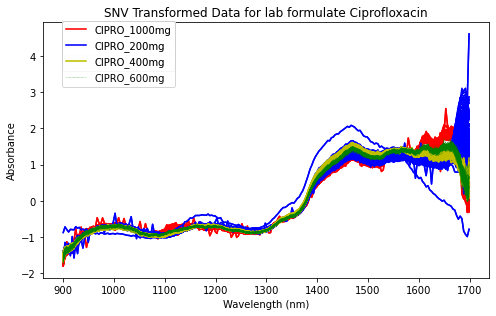

In [15]:
#Visual inspection of line plot of the SNV traeted data from lab formulated Ciprofloxacin in capsules of varying opacities and colors when introduced to NIR spectrometer


data_dece_snv = pd.read_csv(r'Cipro_Data.csv')
x_dece_snv= data_dece_snv.values[:,:]
spectra_dece_snv = snv(x_dece_snv)

spectra_dece_snv = pd.DataFrame(spectra_dece_snv)
spectra_dece_snv = spectra_dece_snv.values[0:,0:]
spectra_dece_snv_T = spectra_dece_snv.T


CIPRO_1000mg_SNV =spectra_dece_snv_T[:,0:200]
CIPRO_200mg_SNV =spectra_dece_snv_T[:,201:402]
CIPRO_400mg_SNV =spectra_dece_snv_T[:,403:604]
CIPRO_600mg_SNV =spectra_dece_snv_T[:,605:804]


    
    
fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, CIPRO_1000mg_SNV, label='CIPRO_1000mg',color='r');
ax.plot(wv, CIPRO_200mg_SNV, label='CIPRO_200mg',color='b');
ax.plot(wv, CIPRO_400mg_SNV, label='CIPRO_400mg',color='y');
ax.plot(wv, CIPRO_600mg_SNV, label='CIPRO_600mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV Transformed Data for lab formulate Ciprofloxacin")



#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

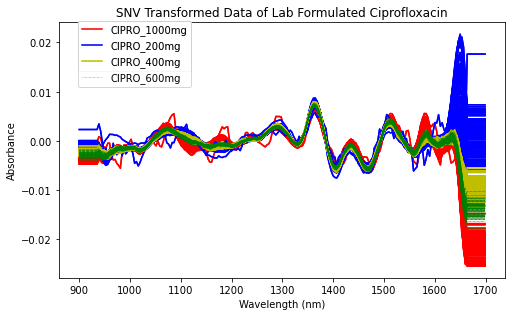

In [16]:
#Visual inspection of line plot of the  SNV+Savitzki Golay (SG) traeted data from lab formulated Deoxycycline in capsules of varying opacities and colors when introduced to NIR spectrometer

Xsnv_sg_dece = savgol_filter(spectra_dece_snv, 21, polyorder = 2, deriv=2) #the parameters can be optimised by manual tuning or grid search

spectra_snvsg_dece = pd.DataFrame(Xsnv_sg_dece)
spectra_snvsg_dece = spectra_snvsg_dece.values[0:,0:]
spectra_T_dece = spectra_snvsg_dece.T


CIPRO_1000mg_SNVSG =spectra_T_dece[:,0:200]
CIPRO_200mg_SNVSG =spectra_T_dece[:,201:402]
CIPRO_400mg_SNVSG =spectra_T_dece[:,403:604]
CIPRO_600mg_SNVSG =spectra_T_dece[:,605:804]


fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, CIPRO_1000mg_SNVSG, label='CIPRO_1000mg',color='r');
ax.plot(wv, CIPRO_200mg_SNVSG, label='CIPRO_200mg',color='b');
ax.plot(wv, CIPRO_400mg_SNVSG, label='CIPRO_400mg',color='y');
ax.plot(wv, CIPRO_600mg_SNVSG, label='CIPRO_600mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("SNV Transformed Data of Lab Formulated Ciprofloxacin")



#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

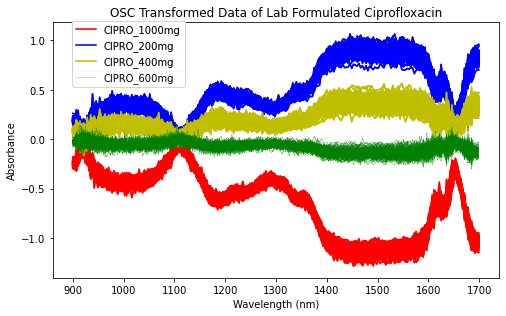

In [17]:
#Visual inspection of line plot of the Orthogonal Signal Correction(OSC) traeted data from lab formulated Ciprofloxacin in varying capsules when introduced to NIR spectrometer



spectra_osc_dece = pd.read_csv(r'Cipro_Data.csv')
target_osc_dece = pd.read_csv(r'Cipro_conc_mg.csv')

opls = OPLS(39)
Z_osc_dece = opls.fit_transform(spectra_osc_dece, target_osc_dece)


Z_T_osc_dece = Z_osc_dece.T

CIPRO_1000mg_OSC =Z_T_osc_dece[:,0:200]
CIPRO_200mg_OSC =Z_T_osc_dece[:,201:402]
CIPRO_400mg_OSC =Z_T_osc_dece[:,403:604]
CIPRO_600mg_OSC =Z_T_osc_dece[:,605:804]


wv = np.arange(900,1700,3.52)


fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, CIPRO_1000mg_OSC, label='CIPRO_1000mg',color='r');
ax.plot(wv, CIPRO_200mg_OSC, label='CIPRO_200mg',color='b');
ax.plot(wv, CIPRO_400mg_OSC, label='CIPRO_400mg',color='y');
ax.plot(wv, CIPRO_600mg_OSC, label='CIPRO_600mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("OSC Transformed Data of Lab Formulated Ciprofloxacin")



#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

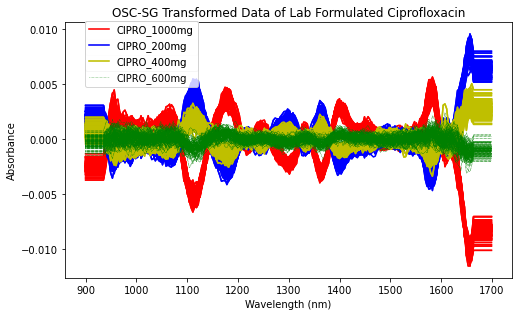

In [18]:
#Visual inspection of line plot of the OSC+SG traeted data from lab formulated Deoxycycline in varying capsules when introduced to NIR spectrometer

Xosc_sg_dece = savgol_filter(Z_osc_dece, 21, polyorder = 2, deriv=2)


Xosc_sg_T_dece = Xosc_sg_dece.T

CIPRO_1000mg_OSC_SG =Xosc_sg_T_dece[:,0:200]
CIPRO_200mg_OSC_SG =Xosc_sg_T_dece[:,201:402]
CIPRO_400mg_OSC_SG =Xosc_sg_T_dece[:,403:604]
CIPRO_600mg_OSC_SG =Xosc_sg_T_dece[:,605:804]




wv = np.arange(900,1700,3.52)



fig, ax = plt.subplots(figsize=(8, 4.7))
loc = ["upper left"]
ax.plot(wv, CIPRO_1000mg_OSC_SG, label='CIPRO_1000mg',color='r');
ax.plot(wv, CIPRO_200mg_OSC_SG, label='CIPRO_200mg',color='b');
ax.plot(wv, CIPRO_400mg_OSC_SG, label='CIPRO_400mg',color='y');
ax.plot(wv, CIPRO_600mg_OSC_SG, label='CIPRO_600mg',color='g',ls=':',lw=0.5);
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title("OSC-SG Transformed Data of Lab Formulated Ciprofloxacin")



#Fix legend
hand, labl = ax.get_legend_handles_labels()
handout=[]
lablout=[]
for h,l in zip(hand,labl):
       if l not in lablout:
        lablout.append(l)
        handout.append(h)
        fig.legend(handout, lablout, bbox_to_anchor=[0.15, 0.9],loc="upper left");

Model development and Evaluation for SNV, SNV_SG and OSC (OPLS) Data Pretreatment

Model development and Evaluation for SNV Data Pretreatment

In [19]:
#Split the dataset (SNV) to train and test sets

X_snv_dece= pd.DataFrame(StandardScaler().fit_transform(spectra_dece_snv_T))

x_snv_dece = X_snv_dece.T
y_snv_dece = target_dece
x_train_dece,x_test_dece,y_train_dece,y_test_dece = train_test_split(x_snv_dece,y_snv_dece,random_state=0,test_size=0.25)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0, 0.5, 'Predicted')

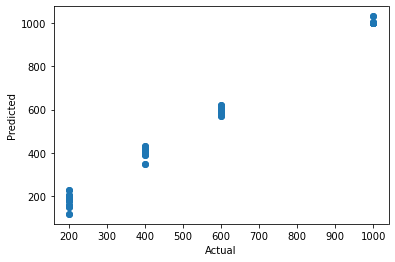

In [20]:
#the dataset (SNV) to train SVM model and test sets

#support vector machine regression model 

#SVM_regression - can be optimised
#Train SVM model

regr_dece = svm.SVR(kernel='poly',gamma = 0.90, C = 1)
regr_dece.fit(x_train_dece, y_train_dece)

#Test the model

clf_1_svr_dece = regr_dece.predict(x_test_dece)



#plot the predicted against actual

plt.scatter(y_test_dece,clf_1_svr_dece)

plt.xlabel("Actual")
plt.ylabel("Predicted")

In [21]:
#determine the correlation co-efficient (R squared) 
q_squared_dece_a1 = r2_score(y_test_dece,clf_1_svr_dece) 
q_squared_dece_a1

0.9973625212898737

In [22]:
#determine the mean square error 

mean_squared_error(y_test_dece, clf_1_svr_dece,squared=False)

14.575491663908144

#SNV treated data showed signifcant improvement in MSE and R squared for SVM_R model

In [23]:
#Grid search for optimized partial least square regression (PLS_R) model

from sklearn.metrics import r2_score

best_r2 = 0
best_ncmop = 0
for n_comp in range(1, 101):
    my_plsr = PLSRegression(n_components=n_comp, scale=True)
    my_plsr.fit(x_train_dece, y_train_dece)
    preds = my_plsr.predict(x_test_dece)
    
    r2 = r2_score(preds, y_test_dece)
    if r2 > best_r2:
        best_r2 = r2
        best_ncomp = n_comp

print(best_r2, best_ncomp)

0.9953249670142624 19


Text(0, 0.5, 'Predicted')

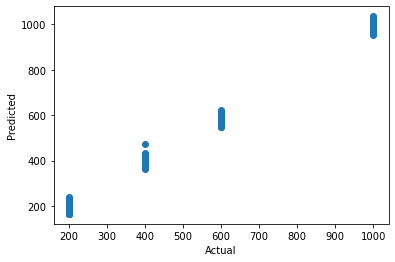

In [24]:
#the dataset (SNV) to train and test sets
#Partial Least square regression model with 14 latent variables

pls_1_dece = PLSRegression(n_components=14)

#Train PLS-R model

pls_1_dece.fit(x_train_dece, y_train_dece)

#test PLS-R model
Y_pred_snv = pls_1_dece.predict(x_test_dece)

#plot the predicted against actual
plt.scatter(y_test_dece,Y_pred_snv)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [25]:
#determine the correlation co-efficient (R squared) 
q_squared_a1 = r2_score(y_test_dece,Y_pred_snv)
q_squared_a1

0.9952666739087184

In [26]:
#determine the root mean square error 

mean_squared_error(y_test_dece,Y_pred_snv,squared=False)

19.525939739158982

#SNV treated data showed signifcant improvement in MSE and R squared for PLS_R model

Model development and Evaluation for SNV_SG Data Pretreatment

In [27]:
#Split the dataset (SNV_SG) to train and test sets

X_dece_snvsg= pd.DataFrame(StandardScaler().fit_transform(spectra_T_dece))

x_dece_snvsg = X_dece_snvsg.T
y_dece_snvsg = pd.DataFrame(target_dece)
x_train_dece_a,x_test_dece_a,y_train_dece_a,y_test_dece_a = train_test_split(x_dece_snvsg,y_dece_snvsg,random_state=0,test_size=0.3)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0, 0.5, 'Predicted')

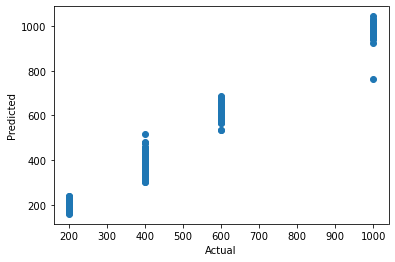

In [28]:
#the dataset (SNV+SG) to train and test sets
#support vector machine (SVM) regression 

#SVM_regression - the parameters can be optimised by manual tuning or grid search

#TraIn SVM model

regr_dece_snvsg = svm.SVR(kernel='poly',gamma = 0.02, C = 1)#the parameters can be optimised by manual tuning or grid search
regr_dece_snvsg.fit(x_train_dece_a, y_train_dece_a)

#Test the model

clf_1svr_dece_snvsg_a = regr_dece_snvsg.predict(x_test_dece_a)


#plot the predicted against actual

plt.scatter(y_test_dece_a,clf_1svr_dece_snvsg_a)

plt.xlabel("Actual")
plt.ylabel("Predicted")

In [29]:
#determine the correlation co-efficient (R squared) 
q_squared_dece_snvsg_a1 = r2_score(y_test_dece_a,clf_1svr_dece_snvsg_a) 
q_squared_dece_snvsg_a1

0.9811617267685329

In [30]:
#determine the root mean sqare error 

mean_squared_error(y_test_dece_a,clf_1svr_dece_snvsg_a,squared=False)

39.69338320511568

In [ ]:
#SNV+SG treated data showed signifcant improvement in MSE and R squared for SVR_R model

In [31]:
from sklearn.metrics import r2_score

best_r2 = 0
best_ncmop = 0
for n_comp in range(1, 101):
    my_plsr = PLSRegression(n_components=n_comp, scale=True)
    my_plsr.fit(x_train_dece_a, y_train_dece_a)
    preds = my_plsr.predict(x_test_dece_a)
    
    r2 = r2_score(preds, y_test_dece_a)
    if r2 > best_r2:
        best_r2 = r2
        best_ncomp = n_comp

print(best_r2, best_ncomp)

0.9712061654346245 24


Text(0, 0.5, 'Predicted')

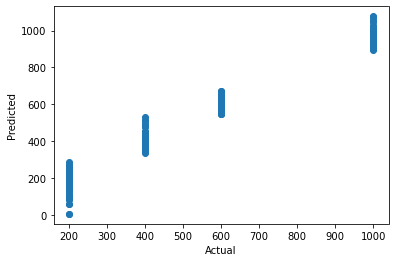

In [32]:
#the dataset (SNV+SG) to train and test sets
#Partial Least square regression (PLS-R) 

pls_1_dece_snvsg_a = PLSRegression(n_components=13)

#Train PLS-R model

pls_1_dece_snvsg_a.fit(x_train_dece_a, y_train_dece_a)

#test PLS-R model
Y_pred_dece_snvsg_a = pls_1_dece_snvsg_a.predict(x_test_dece_a)

#plot the predicted against actual
plt.scatter(y_test_dece_a,Y_pred_dece_snvsg_a)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [33]:
#determine the correlation co-efficient (R squared) 
q_squared_a = r2_score(y_test_dece_a,Y_pred_dece_snvsg_a) 
q_squared_a

0.9690637270577471

In [34]:
#determine the root mean sqare error 

mean_squared_error(y_test_dece_a,Y_pred_dece_snvsg_a,squared=False)

50.8664660985217

In [ ]:
#SNV+SG treated data showed signifcant improvement in MSE and R squared for PLS_R model

Model development and Evaluation for OSC Data Pretreatment - OPLS

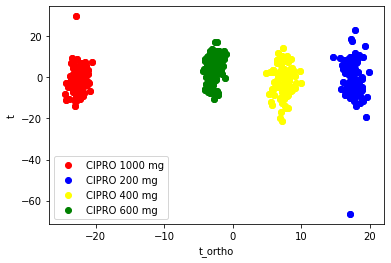

In [35]:
#the dataset (OSC) to train and test sets
spectra_dece = pd.read_csv(r'Cipro_Data.csv')
target_dece = pd.read_csv(r'Cipro_conc_mg.csv')


opls = OPLS(39)
Z_dece = opls.fit_transform(spectra_dece, target_dece)

pls_dece = PLSRegression(1)

#PLS for Raw Data
y_preda_dece_raw = cross_val_predict(pls_dece, spectra_dece, target_dece, cv=LeaveOneOut())
q_squared = r2_score(target_dece, y_preda_dece_raw)  



#OPLS for Orthoginal Scatter Corrected Data
processed_y_opls = cross_val_predict(pls_dece, Z_dece, target_dece, cv=LeaveOneOut())
processed_q_squared = r2_score(target_dece, processed_y_opls) 


plt.figure(1)
pls_dece.fit(Z_dece, target_dece)
df_dece = pd.DataFrame(np.column_stack([pls_dece.x_scores_, opls.T_ortho_[:, 0]]),
                       index=spectra_dece.index, columns=['t', 't_ortho'])    


pos_df_dece = df_dece[0:200]
neg_df_dece = df_dece[201:402]
neg2_df_dece = df_dece[403:604]
neg3_df_dece = df_dece[605:804]



plt.scatter(pos_df_dece['t'], pos_df_dece['t_ortho'], c='red', label='CIPRO 1000 mg')
plt.scatter(neg_df_dece['t'], neg_df_dece['t_ortho'], c='blue', label='CIPRO 200 mg')
plt.scatter(neg2_df_dece['t'], neg2_df_dece['t_ortho'], c='yellow', label='CIPRO 400 mg')
plt.scatter(neg3_df_dece['t'], neg3_df_dece['t_ortho'], c='green', label='CIPRO 600 mg')
#plt.title('PLS Scores for Ciprofloxacin ')
plt.xlabel('t_ortho')
plt.ylabel('t')
plt.legend(loc='lower left')
plt.show()

In [36]:
 #determinr the correlation co-efficient(R-squared) for raw spectra
q_squared_234 = r2_score(target_dece, y_preda_dece_raw)
q_squared_234

0.31276523161134273

In [37]:
#determinr the correlation co-efficient(R-squared) for OSC transformed spectra
rocessed_q_squared_234 = r2_score(target_dece, processed_y_opls)
rocessed_q_squared_234

0.9965224920497251

In [38]:
#determine the root mean square error for the raw spectra

mean_squared_error(target_dece, y_preda_dece_raw,squared=False)

245.1136326502016

In [39]:
#determine the root mean square error for the OSC transformed spectra

mean_squared_error(target_dece, processed_y_opls,squared=False)

17.436084722650538

In [40]:
#Z_dece = opls.transform(spectra_dece, target_dece)

In [42]:
Z_dece_2 = opls.transform(spectra_dece)

In [44]:
#450 spectra of ciprofloxacin tablets collected from Kenya
spectra_dece_dosage = pd.read_csv(r'Jin_Cipro_Branded_CombinedSpectra.csv')
target_dece_dosage = pd.read_csv(r'Jin_Cipro_Branded_BrandID_MG.csv')
target_dece_dosage_mg = target_dece_dosage.iloc[:,1]

#OPLS treatment450 spectra of ciprofloxacin tablets collected from Kenya

Z_dece_DOSAGE = opls.transform(spectra_dece_dosage)

In [45]:
#SNV treatment of 450 spectra of ciprofloxacin tablets collected from Kenya
spectra_dece_dosage_a = pd.DataFrame(spectra_dece_dosage)
spectra_dece_dosage_a = spectra_dece_dosage_a.values[:,:]
spectra_dece_dosage_a = snv(spectra_dece_dosage_a)

In [46]:
#SNV PRETREATED EXTERNAL SAMPLES TESTED ON SNV DEVELOPED MODEL FROM LAB-MADE CIPRO - snmr

svmr_dosage = regr_dece.predict(spectra_dece_dosage_a)

In [47]:
svmr_dosage

array([ 164.43646762,  164.43646762,  200.54177016,  200.54177016,
        233.6515966 ,  233.6515966 ,  144.999192  ,  144.999192  ,
        166.86263592,  166.86263592,  151.52049724,  151.52049724,
        106.59683901,  106.59683901,  127.09210936,  127.09210936,
        168.37170967,  168.37170967,  135.0222263 ,  135.0222263 ,
        179.16686425,  179.16686425,  133.63589518,  133.63589518,
        114.38076503,  114.38076503,  148.74078256,  148.74078256,
        128.81860628,  128.81860628,  193.09500334,  193.09500334,
        174.04595452,  174.04595452,  229.8039628 ,  229.8039628 ,
        214.98236605,  214.98236605,  240.47557386,  240.47557386,
        156.85726557,  156.85726557,  399.57149242,  399.57149242,
        430.90019214,  430.90019214,  447.21136506,  447.21136506,
        360.7933745 ,  360.7933745 ,  411.4263325 ,  411.4263325 ,
        167.5000303 ,  167.5000303 ,   96.6708429 ,   96.6708429 ,
        112.61741765,  112.61741765,   81.90919932,   81.90919

In [48]:
#SNV PRETREATED EXTERNAL SAMPLES TESTED ON SNV DEVELOPED MODEL FROM LAB-MADE CIPRO - plsr
plsr_dosage = pls_1_dece.predict(spectra_dece_dosage_a)

In [49]:
plsr_dosage

array([[ 725.70336721],
       [ 725.70336721],
       [ 761.40107319],
       [ 761.40107319],
       [ 779.67586777],
       [ 779.67586777],
       [ 757.61356166],
       [ 757.61356166],
       [ 759.53289188],
       [ 759.53289188],
       [ 747.95907074],
       [ 747.95907074],
       [ 775.97316302],
       [ 775.97316302],
       [ 769.55191135],
       [ 769.55191135],
       [ 781.941982  ],
       [ 781.941982  ],
       [ 768.73500895],
       [ 768.73500895],
       [ 605.63476931],
       [ 605.63476931],
       [ 660.77900598],
       [ 660.77900598],
       [ 657.67511187],
       [ 657.67511187],
       [ 704.59442302],
       [ 704.59442302],
       [ 673.70752144],
       [ 673.70752144],
       [ 806.68966682],
       [ 806.68966682],
       [ 797.78792708],
       [ 797.78792708],
       [ 780.14460597],
       [ 780.14460597],
       [ 817.94300174],
       [ 817.94300174],
       [ 841.89708611],
       [ 841.89708611],
       [ 806.61495852],
       [ 806.614

In [51]:
#OSC PRETREATED EXTERNAL SAMPLES TESTED ON SNV TREATED DEVELOPED MODEL FROM LAB-MADE CIPRO - plsr (saved )

Y_pred_snv_dosage = pls_1_dece.predict(Z_dece_DOSAGE)
#Y_pred_snv_dosage

In [52]:
#OSC PRETREATED EXTERNAL SAMPLES TESTED ON SNV TREATED DEVELOPED MODEL FROM LAB-MADE CIPRO - svmr

Y_pred_snv_dosage = regr_dece.predict(Z_dece_DOSAGE)
#Y_pred_snv_dosage

An hypothetical proof of Concept with OPLS or OSC transformed spectra of ciprofloxacin tablets

External Validation Set USING ciprofloxacin capsules collected from Liberia and Kenya

In [53]:
## The CIPRO capsule samples 

spectra_dece_dosage = pd.read_csv(r'Jin_Cipro_Branded_CombinedSpectra.csv')
target_dece_dosage = pd.read_csv(r'Jin_Cipro_Branded_BrandID_MG.csv')
target_dece_dosage_mg = target_dece_dosage.iloc[:,1]

#OPLS or OSC transformed spectra of ciprofloxacin tablets collected from Liberia and Kenya

Z_dece_DOSAGE = opls.transform(spectra_dece_dosage)

In [54]:
#snv treated dosage ciprofloxacin from Liberia and Kenya
dosage_a =pd.DataFrame(spectra_dece_dosage) #spectra_dece_dosage.iloc[:,:]
dosage_b = dosage_a.values[:,:]
dosage = snv(dosage_b)

In [55]:
#Here we use the OSC transformed data to train SVM model 


regr_dece_OSC_dosage = svm.SVR(kernel='sigmoid',gamma = 0.002, C = 2) #the parameters can be optimized through manual tuning or grid search 

regr_dece_OSC_dosage.fit(Z_dece, target_dece)

#Test the model
clf_1svr_dece_OSC_dosage = regr_dece_OSC_dosage.predict(Z_dece_DOSAGE)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [56]:
target_dece_dosage_mg_d = target_dece_dosage.iloc[:,0]

df_dosage = pd.DataFrame({'Real Values':target_dece_dosage_mg_d, 'Predicted Values':clf_1svr_dece_OSC_dosage })

df_dosage.to_csv('CIPRO_dosage1')

df_dosage

,Real Values,Predicted Values
0,Cipro_20K-0401_01,667.045118
1,Cipro_20K-0401_02,667.045118
2,Cipro_20K-0401_03,658.847317
3,Cipro_20K-0401_04,658.847317
4,Cipro_20K-0401_05,682.286145
...,...,...
445,Cipro_20K-0552_06,705.075820
446,Cipro_20K-0552_07,683.388353
447,Cipro_20K-0552_08,683.388353
448,Cipro_20K-0552_09,719.963807


In [57]:
clf_1svr_dece_OSC_dosage

array([667.04511832, 667.04511832, 658.84731719, 658.84731719,
       682.28614473, 682.28614473, 661.87387204, 661.87387204,
       694.83327812, 694.83327812, 706.74170907, 706.74170907,
       736.38820794, 736.38820794, 722.42207973, 722.42207973,
       713.23746891, 713.23746891, 680.72793344, 680.72793344,
       557.90711043, 557.90711043, 577.03288604, 577.03288604,
       595.82001794, 595.82001794, 597.32552057, 597.32552057,
       597.2596462 , 597.2596462 , 741.54726612, 741.54726612,
       720.96927884, 720.96927884, 705.86304133, 705.86304133,
       719.43665383, 719.43665383, 730.69236653, 730.69236653,
       712.47729813, 712.47729813, 660.49433521, 660.49433521,
       645.40778807, 645.40778807, 651.43615112, 651.43615112,
       642.23559839, 642.23559839, 636.2379897 , 636.2379897 ,
       784.16798057, 784.16798057, 760.30908262, 760.30908262,
       789.77465939, 789.77465939, 775.90901494, 775.90901494,
       787.83218731, 787.83218731, 579.28210748, 579.28

In [58]:
# Here Orthogonal Scattering Correction based transformation (OPLS) was used to transform lab formulated ciprofloxacin with sigmoid kernel


Z_osc_dosage = opls.transform(spectra_dece)

#Split the dataset to train and test set for model development

x_train_dece_dosagea,x_test_dece_dosagea,y_train_dece_dosagea,y_test_dece_dosagea = train_test_split(Z_osc_dosage, target_dece,random_state=0,test_size=0.3)

#Z_dece_DOSAGE = opls.transform(spectra_dece_dosage)

#Develop the SVM_R model

#regr_dece_OSC_dosage = svm.SVR(kernel='rbf',gamma = 5, C = 2)

regr_dece_OSC_dosage = svm.SVR(kernel='sigmoid',gamma = 0.02, C = 2)#the parameters can be optimized through manual tuning or grid search 


#Train SVM_R model

regr_dece_OSC_dosage.fit(x_train_dece_dosagea, y_train_dece_dosagea)

#Build PLS_R model

pls_1_dece_dosage = PLSRegression(n_components=14)

#Train PLS-R model

pls_1_dece_dosagea = pls_1_dece_dosage.fit(x_train_dece_dosagea, y_train_dece_dosagea)



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [59]:
#Test the SVM_R model's performance using the test dataset


clf_1svr_dece_OSC_dosagea = regr_dece_OSC_dosage.predict(x_test_dece_dosagea)

clf_1svr_dece_OSC_dosagea

array([891.49964289, 365.08198434, 724.17635269, 903.5392046 ,
       283.74952988, 688.63596113, 703.96673881, 672.56485244,
       671.00959231, 899.4205374 , 729.50795424, 357.57603276,
       901.56571184, 711.13888995, 743.49590214, 368.35890972,
       685.2553716 , 367.95152528, 357.34306149, 682.92855321,
       280.80841611, 285.65253937, 355.57425293, 907.57096773,
       902.53359235, 356.42824785, 666.60030663, 374.31739311,
       373.16863575, 898.92993698, 908.02494497, 904.85875406,
       904.64694181, 719.87752275, 357.57603276, 907.5825859 ,
       282.2665873 , 341.99926914, 907.79169774, 903.33782703,
       905.24194554, 363.22163894, 716.13544849, 352.77846311,
       351.85265988, 282.64634651, 900.76542883, 729.50795424,
       343.73838031, 280.54077398, 701.02134479, 283.02762342,
       280.79409071, 730.36384904, 324.18869429, 281.55686252,
       898.6899301 , 348.73286682, 280.82015054, 726.40903129,
       281.55686252, 904.04929095, 280.62458992, 903.82

In [60]:
#Test the PLS_R model's performance using the test dataset - did not give a good performance

pls_1_dece_dosa =pls_1_dece_dosagea.predict(x_test_dece_dosagea)

#pls_1_dece_dosa


In [61]:
#Compare the actual label of the test dataset samples against the predicted by SVM_R model on dataframe and save the data using csv format as svmdosa_

y_test_dece_dosagead= y_test_dece_dosagea.iloc[:,0]


svm_dosa = pd.DataFrame({'Actual':y_test_dece_dosagead, 'Predicted':clf_1svr_dece_OSC_dosagea})

svm_dosa.to_csv('svmdosa_')

In [62]:
#determine the correlation co-efficient(R-squared) for OSC transformed spectra - SVM_R
rocessed_q_squared_dece = r2_score(y_test_dece_dosagead, clf_1svr_dece_OSC_dosagea)
rocessed_q_squared_dece

0.9123190284549278

In [63]:
#determine the root mean square error for the OSC transformed spectra

mean_squared_error(y_test_dece_dosagead, clf_1svr_dece_OSC_dosagea,squared=False)

85.63479211239617

In [64]:
#Compare the actual label of the test dataset samples against the predicted by OPLS_R model on dataframe and save the data using csv format as plsdosa_

y_test_dece_dosagead =  y_test_dece_dosagea.iloc[:,0]

pls_1_dece_dosa_1 = pd.DataFrame(pls_1_dece_dosa)
pls_1_dece_dosa_1a = pls_1_dece_dosa_1.iloc[:,0]

pls_1_dosab = pd.DataFrame({'reall':y_test_dece_dosagead, 'predicted':pls_1_dece_dosa_1a})

pls_1_dosab.to_csv('plsdosa_')

In [65]:
#determine the correlation co-efficient(R-squared) for OSC transformed spectra - pls_r (OPLS)
rocessed_q_squared_dece_ = r2_score(y_test_dece_dosagead, pls_1_dece_dosa_1a)
rocessed_q_squared_dece_

0.9948127389017846

In [66]:
#determine the root mean square error for the OSC transformed spectra - pls_r (OPLS)

mean_squared_error(y_test_dece_dosagead, pls_1_dece_dosa_1a,squared=False)

20.828913929610195

In [67]:
#Predict the external samples - ciprofloxacin pills from field settings

clf_1svr_dece_OSC_dosagext = regr_dece_OSC_dosage.predict(Z_dece_DOSAGE)

clf_1svr_dece_OSC_dosagext

array([916.7081005 , 916.7081005 , 919.33612562, 919.33612562,
       910.10708615, 910.10708615, 918.44884678, 918.44884678,
       903.64710622, 903.64710622, 896.85101609, 896.85101609,
       878.37740593, 878.37740593, 887.24918346, 887.24918346,
       892.97022795, 892.97022795, 910.91768968, 910.91768968,
       840.21014445, 840.21014445, 879.18885633, 879.18885633,
       903.88807672, 903.88807672, 905.41125565, 905.41125565,
       905.36142645, 905.36142645, 875.16420156, 875.16420156,
       888.22499487, 888.22499487, 897.43800829, 897.43800829,
       889.19413604, 889.19413604, 882.07380787, 882.07380787,
       893.4935851 , 893.4935851 , 918.75431234, 918.75431234,
       922.09094785, 922.09094785, 921.11527266, 921.11527266,
       922.3138576 , 922.3138576 , 922.53177377, 922.53177377,
       847.77966625, 847.77966625, 862.97952968, 862.97952968,
       844.28578354, 844.28578354, 853.00918811, 853.00918811,
       845.50318721, 845.50318721, 882.90595055, 882.90

In [68]:
clf_1svr_dece_OSC_dosagext = pd.DataFrame(clf_1svr_dece_OSC_dosagext)

clf_1svr_dece_OSC_dosagext.to_csv('clf_1svr_dece_OSC_dosagext')

In [69]:
#Predict the external samples - doxyxyxline capsules from field settings - pls-r did not give a good performance

pls_1_dece_dosaext =pls_1_dece_dosagea.predict(Z_dece_DOSAGE)

pls_1_dece_dosaext

array([[ 961.13012896],
       [ 961.13012896],
       [ 940.64816196],
       [ 940.64816196],
       [1004.42328016],
       [1004.42328016],
       [ 948.33532386],
       [ 948.33532386],
       [1009.97708671],
       [1009.97708671],
       [1064.88916163],
       [1064.88916163],
       [1138.82210657],
       [1138.82210657],
       [1091.63454771],
       [1091.63454771],
       [1070.33814727],
       [1070.33814727],
       [1021.78596083],
       [1021.78596083],
       [ 703.40342422],
       [ 703.40342422],
       [ 742.30915049],
       [ 742.30915049],
       [ 785.04831009],
       [ 785.04831009],
       [ 779.07508925],
       [ 779.07508925],
       [ 790.9190337 ],
       [ 790.9190337 ],
       [1136.71703352],
       [1136.71703352],
       [1108.53270892],
       [1108.53270892],
       [1055.99115502],
       [1055.99115502],
       [1094.26873531],
       [1094.26873531],
       [1123.69102277],
       [1123.69102277],
       [1073.13940198],
       [1073.139

Cipro_Cellulose_Brand Diluted

In [71]:
#ALL_EXTERNAL_BRANDED CIPRO - mixture

## The cipro  samples 

Cipro_Cellulose_Brand = pd.read_csv(r'Cipro_Cellulose_Brand.csv')
Cipro_Cellulose_Brand_1 = pd.read_csv(r'Cipro_Cellulose_Brand.csv')
Cipro_Cellulose_Brand_ = Cipro_Cellulose_Brand_1.iloc[:,1]
Cipro_Cellulose_Brand_2= Cipro_Cellulose_Brand.iloc[:,1:]

Z_Cipro_Cellulose_Brand_2a = opls.transform(Cipro_Cellulose_Brand_2)

In [72]:
#Predict the external samples - cipro from field settings

clf_1svr_Z_Cipro_Cellulose_Brand = regr_dece_OSC_dosage.predict(Z_Cipro_Cellulose_Brand_2a)

clf_1svr_Z_Cipro_Cellulose_Brand_2 = pd.DataFrame(clf_1svr_Z_Cipro_Cellulose_Brand)

clf_1svr_Z_Cipro_Cellulose_Brand_2.to_csv('osc_svmr_all_Z_Cipro_Cellulose_Brand')

In [73]:
#Predict the external samples - CIPRO capsules from field settings

pls_1_Z_Cipro_Cellulose_Brand_2a =pls_1_dece_dosagea.predict(Z_Cipro_Cellulose_Brand_2a)

pls_1_Z_Cipro_Cellulose_Brand_2a_ = pd.DataFrame(pls_1_Z_Cipro_Cellulose_Brand_2a)


pls_1_Z_Cipro_Cellulose_Brand_2a_.to_csv('osc_pls_all_Z_Cipro_Cellulose_Brand')

Cipro_liege_Samples

In [74]:

#ALL_EXTERNAL_BRANDED CIPRO - Liege

## The cipro  samples 

Cipro_Liege_Brand = pd.read_csv(r'CIPRO_LIEGE_2023.csv')
Cipro_Liege_Brand_1 = pd.read_csv(r'CIPRO_LIEGE_2023.csv')
Cipro_Liege_Brand_ =Cipro_Liege_Brand_1.iloc[:,1]
Cipro_Liege_Brand_2= Cipro_Liege_Brand.iloc[:,1:]

Z_Cipro_Liege_Brand_2a = opls.transform(Cipro_Liege_Brand_2)


In [75]:
#Predict the external samples - cipro capsules from field settings

clf_1svr_Z_Cipro_Liege_Brand = regr_dece_OSC_dosage.predict(Z_Cipro_Liege_Brand_2a)

clf_1svr_Z_Cipro_Liege_Brand_2 = pd.DataFrame(clf_1svr_Z_Cipro_Liege_Brand)

clf_1svr_Z_Cipro_Liege_Brand_2.to_csv('osc_svmr_all_Z_Cipro_Liege_Brand')

In [76]:
#Predict the external samples - doxyxyxline capsules from field settings

pls_1_Z_Cipro_Liege_Brand_2a =pls_1_dece_dosagea.predict(Z_Cipro_Liege_Brand_2a)

pls_1_Z_Cipro_Liege_Brand_2a_ = pd.DataFrame(pls_1_Z_Cipro_Liege_Brand_2a)


pls_1_Z_Cipro_Liege_Brand_2a_.to_csv('osc_pls_all_Z_Cipro_Liege_Brand')

Cipro_Cellulose_Samples

In [77]:
#CIPRO_Cellulose_2023

#ALL_EXTERNAL_BRANDED CIPRO - Liege

## The cipro  samples 

Cipro_Cell_Brand = pd.read_csv(r'CIPRO_Cellulose_2023.csv')
Cipro_Cell_Brand_1 = pd.read_csv(r'CIPRO_Cellulose_2023.csv')
Cipro_Cell_Brand_ =Cipro_Cell_Brand_1.iloc[:,1]
Cipro_Cell_Brand_2= Cipro_Cell_Brand.iloc[:,1:]

Z_Cipro_Cell_Brand_2a = opls.transform(Cipro_Cell_Brand_2)

In [78]:
#Predict the external samples - doxyxyxline capsules from field settings

clf_1svr_Z_Cipro_Cell_Brand = regr_dece_OSC_dosage.predict(Z_Cipro_Cell_Brand_2a)

clf_1svr_Z_Cipro_Cell_Brand_2 = pd.DataFrame(clf_1svr_Z_Cipro_Cell_Brand)

clf_1svr_Z_Cipro_Cell_Brand_2.to_csv('osc_svmr_all_Z_Cipro_Cell_Brand')

In [79]:
#Predict the external samples - doxyxyxline capsules from field settings

pls_1_Z_Cipro_Cell_Brand_2a =pls_1_dece_dosagea.predict(Z_Cipro_Cell_Brand_2a)

pls_1_Z_Cipro_Cell_Brand_2a_ = pd.DataFrame(pls_1_Z_Cipro_Cell_Brand_2a)


pls_1_Z_Cipro_Cell_Brand_2a_.to_csv('osc_pls_all_Z_Cipro_Cell_Brand')

In [88]:
#the dataset (OSC) to test sets lab grade CIP
PureCIP = pd.read_csv(r'PURECIP.csv')



PureCIP_1 = opls.transform(PureCIP)

In [91]:
#the dataset (OSC) to train and test sets
BenchTop = pd.read_csv(r'BenchTop.csv')
#target_ciproce = pd.read_csv(r'Cipro_conc_percent_1.csv')


BenchTop_1 = opls.transform(BenchTop)


#BenchTop_1

In [96]:
BenchTop_OSC_pls_2=pls_1_dece_dosagea.predict(BenchTop_1)
BenchTop_OSC_pls_2

array([[1057.88689842],
       [1051.42778299],
       [ 963.68325785],
       [ 962.48882162],
       [ 966.48422998],
       [ 826.7437348 ],
       [ 739.39364809],
       [1032.87935939],
       [ 983.52559716],
       [1046.53376226],
       [ 956.75958838],
       [1493.06244805],
       [1500.87722778]])

In [97]:
#the dataset (OSC) to train and test sets
CIP_FIED_DILUTE_INNO = pd.read_csv(r'CIP_FIED_DILUTE_INNO.csv')
#target_ciproce = pd.read_csv(r'Cipro_conc_percent_1.csv')


CIP_FIED_DILUTE_INNO_1 = opls.transform(CIP_FIED_DILUTE_INNO)


#CIP_FIED_DILUTE_INNO


In [102]:
CIP_FIED_DILUTE_INNO_1_OSC_svr_2 = regr_dece_OSC_dosage.predict(CIP_FIED_DILUTE_INNO_1)

CIP_FIED_DILUTE_INNO_1_OSC_svr_2

array([659.53255204, 718.59340358, 653.54063239, 675.58358943,
       527.87440054, 306.07755937, 526.05041411, 423.66642353,
       664.49658439, 468.37872181, 625.6839223 , 634.7862827 ,
       515.60956037, 522.50400415, 373.5961377 , 654.03971997,
       651.70161817, 589.30928832, 740.96049785, 606.27044224,
       354.5546168 , 279.8345289 , 404.21185177, 378.82002142,
       728.28414307, 574.55812618, 751.83684806, 683.89976436,
       669.26356857, 517.13234751, 572.57179645, 509.53306524,
       516.48465194, 817.0180262 , 736.27672844, 800.63900797,
       840.35537747, 557.63299223, 287.94514105, 293.24834557,
       353.04217906, 390.49387904, 350.57944376, 354.07933069,
       319.6661036 , 298.6844252 , 294.29458927, 284.9879512 ,
       308.38978858, 281.4194245 , 290.26717924, 413.51892284,
       293.00960759, 418.86267732, 280.8326414 , 613.71257324,
       320.17632283, 426.81047192, 320.17836183, 418.67397918,
       355.13617074, 359.93545752, 321.79154262, 283.40

In [103]:
CIP_FIED_DILUTE_INNO_1_OSC_pls_2=pls_1_dece_dosagea.predict(CIP_FIED_DILUTE_INNO_1)
CIP_FIED_DILUTE_INNO_1_OSC_pls_2

array([[594.93766362],
       [634.9869347 ],
       [583.8458601 ],
       [598.35024802],
       [529.47989297],
       [352.1402862 ],
       [532.2655957 ],
       [468.4707793 ],
       [597.57762154],
       [496.43734866],
       [571.20959973],
       [584.60188456],
       [508.81100169],
       [511.0589824 ],
       [416.1498145 ],
       [586.6342703 ],
       [585.04234709],
       [555.93954388],
       [640.59706289],
       [570.27562039],
       [404.84401607],
       [244.43807681],
       [440.46512455],
       [427.36637237],
       [620.76347874],
       [548.04263214],
       [631.30613432],
       [591.24200735],
       [589.08684358],
       [526.83002779],
       [542.14211015],
       [516.84732393],
       [513.97904851],
       [681.63530709],
       [638.91054189],
       [676.43671657],
       [710.68741821],
       [535.26849277],
       [303.4845846 ],
       [320.50139834],
       [400.18764264],
       [430.24919882],
       [404.50022216],
       [404

In [104]:
#the dataset (OSC) to train and test sets
Benchtop_02 = pd.read_csv(r'Benchtop_02.csv')
#target_ciproce = pd.read_csv(r'Cipro_conc_percent_1.csv')


CIP_Benchtop_02_1 = opls.transform(Benchtop_02)


#CIP_FIED_DILUTE_INNO


In [109]:
CIP_Benchtop_02_1_OSC_svr_2 = regr_dece_OSC_dosage.predict(CIP_Benchtop_02_1)

CIP_Benchtop_02_1_OSC_svr_2

array([842.11969687, 879.20809753, 855.10262322, 499.85765222,
       897.89721693, 561.81603914, 709.42955625, 518.19739694,
       415.05962858, 729.66067723, 837.47730921, 569.95959442,
       833.5497089 , 795.50921315, 443.89888838, 920.93116509])

In [110]:
CIP_Benchtop_02_1_OSC_pls_2=pls_1_dece_dosagea.predict(CIP_Benchtop_02_1)
CIP_Benchtop_02_1_OSC_pls_2

array([[737.82113513],
       [780.81963487],
       [747.33344641],
       [533.30668589],
       [807.12998847],
       [567.8948927 ],
       [648.98481718],
       [547.9963762 ],
       [480.51777348],
       [653.8640156 ],
       [730.39253579],
       [571.40016431],
       [727.39466541],
       [704.62180343],
       [506.53453721],
       [949.15479757]])

In [111]:

##conflicting dataset with prior results



#the OSC transformed dataset of the NIR-M_R2 and BenchTop NIR V-670, Jasco were evaluated by our predictive models

CIP_NIRMR2VSBENCHTOP = pd.read_csv(r'NIR-M-R2_and_Benchtop_NIR _V-670.csv')
#target_ciproce = pd.read_csv(r'Cipro_conc_percent_1.csv')


CIP_NIRMR2VSBENCHTOP_01 = opls.transform(CIP_NIRMR2VSBENCHTOP)


In [112]:
CIP_NIRMR2VSBENCHTOP_OSC_pls= pls_1_dece_dosagea.predict(CIP_NIRMR2VSBENCHTOP_01)

CIP_NIRMR2VSBENCHTOP_OSC_pls

array([[737.82113513],
       [597.57762154],
       [949.15479757],
       [542.14211015],
       [730.39253579],
       [583.8458601 ],
       [780.81963487],
       [508.81100169],
       [747.33344641],
       [727.39466541],
       [548.04263214],
       [704.62180343],
       [648.98481718],
       [529.47989297],
       [807.12998847],
       [555.93954388],
       [567.8948927 ],
       [241.42974172],
       [547.9963762 ],
       [325.33379951],
       [480.51777348],
       [277.53410485],
       [653.8640156 ],
       [321.71552055],
       [571.40016431],
       [418.3386865 ],
       [506.53453721],
       [287.20080092],
       [533.30668589],
       [319.29218167],
       [772.26045961],
       [767.53579393],
       [748.27119096],
       [816.15697722],
       [602.26599969],
       [557.64631885],
       [790.03790113],
       [766.78595983],
       [787.69748069],
       [583.18602976],
       [835.11328027],
       [970.11752486],
       [871.0482107 ],
       [964

In [113]:
#OSC+SVMR predictive model 

CIP_NIRMR2VSBENCHTOP_OSC_svr= regr_dece_OSC_dosage.predict(CIP_NIRMR2VSBENCHTOP_01)

CIP_NIRMR2VSBENCHTOP_OSC_svr

array([842.11969687, 664.49658439, 920.93116509, 572.57179645,
       837.47730921, 653.54063239, 879.20809753, 515.60956037,
       855.10262322, 833.5497089 , 574.55812618, 795.50921315,
       709.42955625, 527.87440054, 897.89721693, 589.30928832,
       561.81603914, 279.88925238, 518.19739694, 294.29458927,
       415.05962858, 281.4194245 , 729.66067723, 299.28217564,
       569.95959442, 359.93545752, 443.89888838, 283.40871319,
       499.85765222, 298.6844252 , 898.92388195, 894.75786992,
       880.60175422, 913.84342264, 700.46049599, 625.63422728,
       905.27285841, 894.75951216, 905.20603885, 664.68889086,
       917.44693969, 913.07553205, 922.46808418, 914.4203576 ,
       918.73402132, 853.99031242, 920.48606517, 917.78593003,
       922.52008018, 919.78229445])